# Machine Learning workflow 

In this notebook we go through some of the most common ML workflow from impoting datasets , doing some data analysis,
checking for the best ML model , model evaluation 

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd

In [ ]:
# Reading in the data using read_csv method
df = pd.read_csv('car-sales-extended.csv')
df.head(10)

In [6]:
# Check for missing values
df.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [38]:
# intiating X and Y
x = df.drop('Price',1)
y = df['Price']

In [39]:
df['Price'].dtype

dtype('int64')

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [41]:
x.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors'], dtype='object')

In [42]:
df['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [43]:
# Onehotencoder and columntranformer to convert categorical data into encoded data
onehot = OneHotEncoder()
cats = ['Make','Colour','Doors']

transformer = ColumnTransformer([("onehot",
                               onehot,
                               cats)],
                               remainder='passthrough')

In [44]:
tranx = transformer.fit_transform(x)

In [45]:
x.head(10)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
5,Honda,Red,42652,4
6,Toyota,Blue,163453,4
7,Honda,White,43120,4
8,Nissan,White,130538,4
9,Honda,Blue,51029,4


In [46]:
tranx

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [52]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tranx,y,test_size=0.2,random_state=42)

In [53]:
x_train

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.12004e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.56730e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.46824e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.18760e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.86250e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [56]:
# regression model for this project
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(100)

In [57]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
preds=model.predict(x_test)

In [60]:
# looks like pretty good score ......
model.score(x_test,y_test)

0.30491084565475046

## Handling missing data

In [20]:
df = pd.read_csv('car-sales-extended-missing-data.csv')

In [3]:
df.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [7]:
df.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [10]:
X = df.drop('Price',1)
y = df['Price']

In [12]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [14]:
df['Make'].isnull().sum()

49

In [30]:
# filling missing data in make and colours columns with "missing" and with the mean of odometer column for Odometer column
df['Make'].fillna('missing',inplace=True)
df['Colour'].fillna('missing',inplace=True)
df['Doors'].fillna(4,inplace=True)
df['Odometer (KM)'].fillna(df['Odometer (KM)'].mean(),inplace=True)

In [38]:
df.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [51]:
#converting categorical feaatures into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#importing done now the actual work
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transx = transformer.fit_transform(X)
transx

<1000x15 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

## Filling missing data using sci-kit learn

In [98]:
df = pd.read_csv('car-sales-extended-missing-data.csv')

In [56]:
df.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [99]:
# Check for missing data

df.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
# lot many!!!!

In [101]:
#splitting data into dependent(X) and independent(y)
X = df.drop('Price',1)
y = df.Price

In [102]:
#splitting data into training and and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [103]:
# Filling the missing values using sci-kit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Initialize the imputer function
cate = SimpleImputer(strategy='constant',fill_value='missing')
doors = SimpleImputer(strategy='constant',fill_value=4)
numbs = SimpleImputer(strategy='mean')

# defining the var
cat_f = ['Make','Colour']
door = ['Doors']
num = ['Odometer (KM)']

# This is going to fill in the missing data
imputer = ColumnTransformer([
    ("cat_imputer", cate,cat_f),
    ('doors_imputer',doors,door),
    ('num_imp',numbs,num)
])

# fitting and tranforming X
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [104]:
x_train

array([['Honda', 'Red', 4.0, 101835.0],
       ['Nissan', 'White', 3.0, 149347.0],
       ['Nissan', 'Blue', 3.0, 197823.0],
       ...,
       ['BMW', 'White', 5.0, 16274.0],
       ['Nissan', 'White', 4.0, 209259.0],
       ['Toyota', 'White', 4.0, 202435.0]], dtype=object)

In [105]:
# Now the x train nd x_test are in nd.array , should convert it to DataFrame!!

training_data = pd.DataFrame(x_train,
                            columns=['Make','Colour','Doors','Odometer (KM)'])

testing_data = pd.DataFrame(x_test,
                           columns=['Make','Colour','Doors','Odometer (KM)'])

In [106]:
training_data.head(3)

,Make,Colour,Doors,Odometer (KM)
0,Honda,Red,4,101835
1,Nissan,White,3,149347
2,Nissan,Blue,3,197823


In [107]:
training_data.isnull().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [108]:
#Encoding the data
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

cats = ['Make','Doors','Colour']
trans = ColumnTransformer([('one-hot',
                          one_hot,
                          cats)],
                         remainder='passthrough')


final_x_train = trans.fit_transform(training_data)
final_x_test = trans.fit_transform(testing_data)

In [109]:
final_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.01835e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.49347e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.97823e+05],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62740e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.09259e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.02435e+05]])

In [110]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(final_x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
#Dropping all the data points with no label
df.dropna(subset=["Price"], inplace=True)
df.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [111]:
model.score(final_x_test,y_test)

0.2890294296872361

## Choosing the best ML model

Will try to find the appropriate machine learning model for 
* Regression - boston dataset
* Classification - heart disease 

### Finding the best ML model for regression task 

In [47]:
# will import boston housing dataset from sci-kit learn

from sklearn.datasets import load_boston

In [48]:
boston = load_boston() # loading the dataset , doesn't look the way i wnanted it to be
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

#### Data is in numpy array form , lets convert it into dataframe 

In [49]:
df = pd.DataFrame(boston['data'],
                 columns=boston['feature_names']) # 'feature names' as defined in the boston dataset
df['target'] = pd.Series(boston['target']) # combining target to dataset

In [50]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


###### everything looks good now !!

In [20]:
len(df) # 596 data points ridge regression looks good!!

506

In [51]:
X = df.drop('target',1)
y = df['target']

In [52]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import Ridge
model = Ridge() # Ridge regression is kinda like linear regression

model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
model.score(x_test,y_test) #lezz check the score 

0.7933792746103192

In [34]:
### now testing the same with ensemble models , as suggested by sci-kit learn 
from sklearn.ensemble import RandomForestRegressor
newmodel = RandomForestRegressor(n_estimators=100)

newmodel.fit(x_train,y_train)
newmodel.score(x_test,y_test)

0.9059331617284411

In [35]:
### Randomforestregressor got it pretty accuratem

### Classification
will be using the heart disease dataset for this

In [2]:
heart_df = pd.read_csv('C:\\Users\\Madhav\\Downloads\\dbml\\Matplotlib\\heart.csv')

In [3]:
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#heart_df.isnull().sum() 
# checked for missing values turns out there are none!!

In [5]:
X = heart_df.drop('target',1)
y = heart_df['target']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Trying out `LinearSVM` model as suggested by sci-kit learn documentation 

In [7]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\Madhav\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.819672131147541

###### Well that was quite unexpeted , was expecting score somewher around 40-50 

#### Lets try `RandomForestClassifier` next , ensemble models are always powerfull 

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8360655737704918

Thats only a small difference , but this small difference can go a long way 

### Making predictions using the trained model 

In [19]:
array_to_predict = np.array([np.random.random(x_test.shape[1])]) # make sure the shape of the array passed for predictions
                      # is same as the shape of the data it is trained on

In [20]:
array_to_predict

array([[0.24590714, 0.80914945, 0.13537661, 0.9155315 , 0.08100834,
        0.47383012, 0.52110325, 0.93559984, 0.93274807, 0.51435012,
        0.23049647, 0.50944755, 0.54474821]])

In [21]:
model.predict(array_to_predict) # the shape was the same, so we got the pred . you may face errors here most of the time

array([0], dtype=int64)

#### Can also use evalution metrics from sklearn 

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(x_test),y_test) # this is the same as model.score()
 # sklearn also offers other evaluation metrics such as confusion metrix and classificaiton report

0.8360655737704918

#### Checking the probabilities of predictions 

In [26]:
print(model.predict_proba(x_test[:6])) #predicting probabilities for the first 6 datapoints

print(model.predict(x_test[:6])) #predicting lables for firts 6 datapoints

# can observe one thing the label with prob more than 50% is votes

[[0.66 0.34]
 [0.99 0.01]
 [0.54 0.46]
 [0.88 0.12]
 [0.16 0.84]
 [0.44 0.56]]
[0 0 0 0 1 1]


 ## Evaluating model performance 

In [4]:
import numpy as np
import pandas as pd

In [5]:
# lets try this with boston housing dataset

from sklearn.datasets import load_boston
data = load_boston()

In [6]:
#data # data in numpy array form should convert it into dataframe

In [7]:
df = pd.DataFrame(data['data'],
                columns=data['feature_names'])

df['target'] = pd.Series(data['target'])

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### using cross_val_score for evaluation 

In [9]:
X = df.drop('target',1)
y = df['target']

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,X,y,cv=5) #cv is the number of splits the data is going to have

array([0.7786006 , 0.84181946, 0.56943126, 0.48141849, 0.16555876])

## Evaluation methods for classification problems 

evaluation metrics are different for both regression and classificaiton 
* for regression: mean absolute error and r sqaured erros are used most often
* for classification : classificaiton report , confusion_metrics , ROC curves are used 

In [4]:
# been a while coding things up , time to import the libs once again!
import numpy as np
import pandas as pd

In [32]:
# will be using the heart disease dataset
df = pd.read_csv('C:\\Users\\Madhav\\Desktop\\ML\\Matplotlib\\heart.csv')
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df.drop('target',1) #droping target for X values
y = df['target'] #taking in the target column for y

model = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(model,X,y,cv=5)

In [8]:
scores # scores from 5 folds

array([0.83606557, 0.90163934, 0.80327869, 0.78333333, 0.81666667])

In [9]:
#finding the mean score
np.mean(scores)

0.8281967213114754

### Evaluating using ROC curves 

ROC curves are used to compare the true positive rates to the false positive rates

* True positive : when ans is 1 and prediction is also 1
* Fasle positive : when ans is 1 and prediction is 0
* True negative : when ans is 0 and the prediction is also 0
* False negative : when ans is 0 but the prediction is 1

In [15]:
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [12]:
model.fit(x_train,y_train)

probs = model.predict_proba(x_test) #gettign the probs 

In [15]:
probs[:5]

array([[0.94, 0.06],
       [0.7 , 0.3 ],
       [0.09, 0.91],
       [0.9 , 0.1 ],
       [0.01, 0.99]])

In [17]:
pos = probs[:,1] # getting all the probabilities of positive predictions
pos

array([0.06, 0.3 , 0.91, 0.1 , 0.99, 0.38, 0.01, 0.15, 0.46, 0.7 , 0.83,
       0.09, 0.93, 0.06, 0.76, 0.33, 0.55, 0.81, 0.66, 0.77, 0.78, 0.68,
       0.79, 0.82, 0.39, 0.3 , 0.7 , 0.83, 0.83, 1.  , 0.98, 0.75, 0.81,
       0.34, 0.61, 0.21, 0.29, 0.4 , 0.28, 0.39, 0.8 , 0.71, 0.62, 0.73,
       0.1 , 0.17, 0.23, 0.54, 0.05, 0.02, 0.85, 0.57, 0.17, 0.81, 0.26,
       0.77, 0.98, 0.82, 0.95, 0.91, 0.72])

In [18]:
# to calculate the false positive , true positives 
fpr,tpr,thres = roc_curve(y_test,pos)

In [21]:
tpr

array([0.  , 0.04, 0.08, 0.16, 0.24, 0.32, 0.36, 0.44, 0.44, 0.52, 0.64,
       0.64, 0.72, 0.72, 0.8 , 0.84, 0.84, 0.88, 0.88, 0.92, 0.92, 0.96,
       0.96, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

### ROC curves shows the performance of the model , between the false positive and true positives 

* Higher the AUC values better the performance 

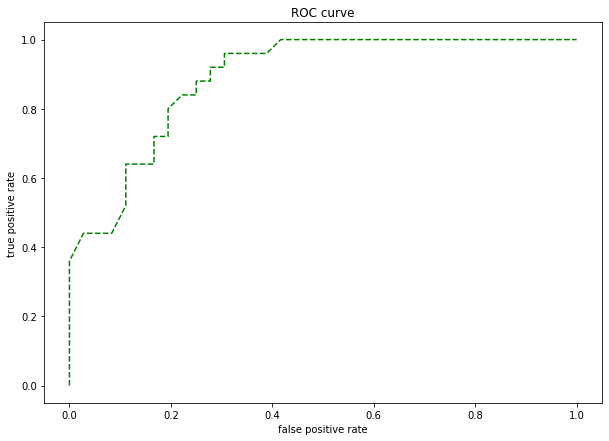

In [31]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,7))
ax.plot(fpr,tpr,color='green',linestyle='--')

ax.set(title='ROC curve',
      xlabel='false positive rate',
      ylabel='true positive rate');

#### Evaluation for regression 

We usually use three evaluation metrics for regression 
* R**2 
* MAE : mean absolute error
* MSE : mean squared error

### R**2

R squared is the difference between the mean of the actual target to the predictions 
if all our predictions are the mean of the actual targets then the R^2 value would be 0 and if the 
predictions are 100 per right then the R^2 will be 1

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100) #sklearn needs the n_estimators to be initialized to 100, in verions
                     #0.22 and above n_estimators is set default to 100

model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [41]:
preds=model.predict(x_test)

In [42]:
model.score(x_test,y_test) #model achieves over 89% , and the metric used is r^2

0.8747679134163292

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,preds) # we get the same output

0.8747679134163293

In [45]:
# what happens if you give preds as y_test mean 
y_mean = np.full(len(y_test),np.mean(y_test))
r2_score(y_mean,y_test)

-3.0831883432269003e+29

In [61]:
#what happensn if y_test and predictions are the same , this is the case of 100% accuracy
#at this time r^2 should also be giving 1 as output

r2_score(y_test,y_test)

1.0

In [63]:
### MAE (Mean absoulte error) , calculates the mean distance between the actual prediction and the error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error

mae(y_test,preds) 

2.1037156862745103

#### Shows that every prediction on an average is 2.103 plus/minus from the actual target value 

In [73]:
## creating a dataframe to make it more understandable

newdf = pd.DataFrame({'actual value': y_test,
                     'predicted value':preds})

newdf['difference'] = newdf['predicted value'] - newdf['actual value']

In [74]:
newdf['difference'].mean() #well tbh i was expecing it to ouput the exact output as of from mae,
                     #but will check whats wrong with this...

0.08193137254901897

### Mean squared error 

Mean squarred error squares all the errors (actual value - prediction) then sums up all the errors and takes 
the mean , in short we have to try to reduce the MSE

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
model.fit(x_train,y_train)

mse(model.predict(x_test),y_test) # mse is 11.36

11.36141274509804

#### quick reminder , MSE and MAE are ment to be low and R^2 should be as high as possible (max is 1.0) 

### Now using `scoring` with cross_val_score 

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df.drop('target',1)
y = df['target']

model = RandomForestClassifier(n_estimators =100)

In [38]:
cv = cross_val_score(model,X,y,cv=5) 
print(f"Mean accuracy after 5 folds :{np.mean(cv)*100:.2f}%")

Mean accuracy after 5 folds :83.16%


In [40]:
cv1 = cross_val_score(model,X,y,cv=5,scoring='precision')
print(f"Precision of model: {np.mean(cv1)*100:.2f}")

Precision of model: 82.32


In [41]:
cv2 = cross_val_score(model,X,y,cv=5,scoring='recall')
print(f"Recall of the model: {np.mean(cv2)*100:.2f}")

Recall of the model: 86.06


In [42]:
cv3 = cross_val_score(model,X,y,cv=5,scoring='f1')
print(f"F1 score of model: {np.mean(cv3)*100:.2f}")

F1 score of model: 82.65


#### Now for regression 

In [46]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
from sklearn.model_selection import cross_val_score

In [50]:
print(f"Mean accuracy of model: {np.mean(cross_val_score(model,X,y,cv=5))*100:.2f}")

Mean accuracy of model: 63.41


In [49]:
cv = cross_val_score(model,X,y,cv=5,scoring='r2')
print(f"R^2 score of model: {np.mean(cv)*100:.2f}")

R^2 score of model: 60.40


In [53]:
cv1 = cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=5)
print(f"Mean absolute error of model: {np.mean(cv1)}")

Mean absolute error of model: -3.0332163075131033


In [52]:
cv2 = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
print(f"Mean squared error: {np.mean(cv2)}")

Mean squared error: -21.655792308134334


# Improving Machine Learning model 

basically hypertunning the model parameters 

On what does the performance of model depend on :
* data : More the amount of data better the performance
* model : Always check for better models if available
* ability to find patters in the data :

     parameters - ability to find patterns in the data
     
     hyperparameters - ability to adjust the model such that it does better in finding underlying patterns 

##### adjusting hyperparameters is also know as parameter tunning :) 